In [1]:
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (8, 6)}
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

In [2]:
def ajustarArray(x):
    array = np.array([])
    for z in x:
        array = np.append(array, z)
    return array

In [3]:
# função criada para no dataset de testes retornar 5 para VERDADEIRO e 4 para FALSO
# utilizei essa função para visualizar as linhas certas e as erradas em diferentes cores no gráfico de disperção 
def resultadoTeste(resultado_treino, gabarito_teste):
    x = (resultado_treino == gabarito_teste)
    x = x+4
    return x

In [4]:
# Definir os tipos de Iris para valores númericos
# utilizei essa função também para visualizar os tipos de Iris no gráfico 
def tipoDeIris(x):
    if x == 'Iris-setosa':
        return 1
    elif x == 'Iris-versicolor':
        return 2
    else:
        return 3

In [5]:
# Ler os dados do arquivo .CSV e nomear as colunas
dfIris = pd.read_csv('iris.csv', header=None)
dfIris.columns=(['Largura Sepala', 'Comprimento Sepala', 'Largura Petala', 'Comprimento Petala', 'Tipo'])

In [6]:
# Verificar a quantidade de colunas tem o dataset
len(dfIris.columns)

5

In [7]:
# Verificar os tipos de classes existentes
dfIris['Tipo'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Verificar a quantidade de cada classe tem no dataset
print('Class Iris-setosa: ', dfIris.loc[dfIris['Tipo'] == 'Iris-setosa']['Tipo'].count())
print('Class Iris-versicolor: ', dfIris.loc[dfIris['Tipo'] == 'Iris-versicolor']['Tipo'].count())
print('Class Iris-virginica: ', dfIris.loc[dfIris['Tipo'] == 'Iris-virginica']['Tipo'].count())

Class Iris-setosa:  50
Class Iris-versicolor:  50
Class Iris-virginica:  50


In [9]:
# Criar mais uma coluna chamada de 'NumTipo' que define os tipos de Iris em valores númericos
dfIris['NumTipo'] = dfIris['Tipo'].apply(tipoDeIris)

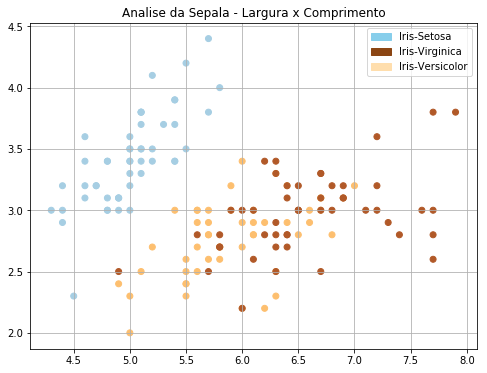

In [10]:
# Vizualizando o corportamento dos dados através do gráfico de dispersão
# Análise da largura da sepala por Comprimento da Sepala
plt.scatter(
    dfIris['Largura Sepala'], dfIris['Comprimento Sepala'], 
    c=dfIris['NumTipo'], cmap='Paired', alpha=1.5
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
marrom = mpatches.Patch(color='saddlebrown', label='Iris-Virginica')
bege = mpatches.Patch(color='navajowhite', label='Iris-Versicolor')
plt.legend(handles=[azul, marrom, bege])

plt.title('Analise da Sepala - Largura x Comprimento')

plt.grid(True)
plt.show()

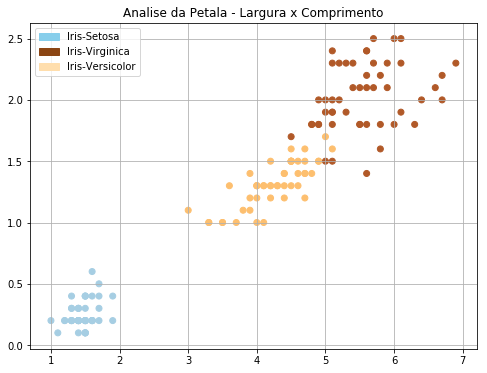

In [11]:
# Vizualizando o corportamento dos dados através do gráfico de dispersão
# Análise da largura da Petala por Comprimento da Petala
plt.scatter(
    dfIris['Largura Petala'], dfIris['Comprimento Petala'], 
    c=dfIris['NumTipo'], cmap='Paired', alpha=1
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
marrom = mpatches.Patch(color='saddlebrown', label='Iris-Virginica')
bege = mpatches.Patch(color='navajowhite', label='Iris-Versicolor')
plt.legend(handles=[azul, marrom, bege])

plt.title('Analise da Petala - Largura x Comprimento')

plt.grid(True)
plt.show()

In [12]:
#Treinamento
x = dfIris[['Largura Sepala','Comprimento Sepala', 'Largura Petala', 'Comprimento Petala']]
y = dfIris[['NumTipo']]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(x_treino, y_treino)
#resultado_treino recebe o valor em array
resultado_treino = knn.predict(x_teste)
x_treino

c:\users\almer\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [13]:
# Para realizar a comparação do resultado_treino com y_teste para verificar a precisão de acertos foi utilizado a 
# função ajustarArray, pois resultado_treino é um array[n] e o y_teste é pandas.dataframe (convertido para uma array[n][0] pela 
# função .as_matrix() por esse motivo não poderia ser comparado simplesmente por resultado_treino == y_teste ou 
# resultado_treino == y_teste.as_matrix())

# Definindo estrutura de dados semelhantes para comparação
y = ajustarArray(y_teste.as_matrix())
# Passando os valores para transformar os resultados do treinamento (VERDAIDERO e FALSO em valores 5 e 4, repectivamente)
x = resultadoTeste(resultado_treino, y)
# Criando um dataset de resultados dos testes
dataset_teste = x_teste.copy()
dataset_teste['Tipo'] = x

In [14]:
# Criando um dataset de resultados do treinamento
dataset_treino = x_treino
dataset_treino['Tipo'] = y_treino
dataset_treino

,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala,Tipo
81,5.5,2.4,3.7,1.0,2
133,6.3,2.8,5.1,1.5,3
137,6.4,3.1,5.5,1.8,3
75,6.6,3.0,4.4,1.4,2
109,7.2,3.6,6.1,2.5,3
96,5.7,2.9,4.2,1.3,2
105,7.6,3.0,6.6,2.1,3
66,5.6,3.0,4.5,1.5,2
0,5.1,3.5,1.4,0.2,1
122,7.7,2.8,6.7,2.0,3


In [15]:
# Criando um dataset de resultados do treinamento junto com o de dataset de resultados dos testes
dataset_resultado = [dataset_treino, dataset_teste]
dataset_resultado = pd.concat(dataset_resultado)
dataset_resultado

,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala,Tipo
81,5.5,2.4,3.7,1.0,2
133,6.3,2.8,5.1,1.5,3
137,6.4,3.1,5.5,1.8,3
75,6.6,3.0,4.4,1.4,2
109,7.2,3.6,6.1,2.5,3
96,5.7,2.9,4.2,1.3,2
105,7.6,3.0,6.6,2.1,3
66,5.6,3.0,4.5,1.5,2
0,5.1,3.5,1.4,0.2,1
122,7.7,2.8,6.7,2.0,3


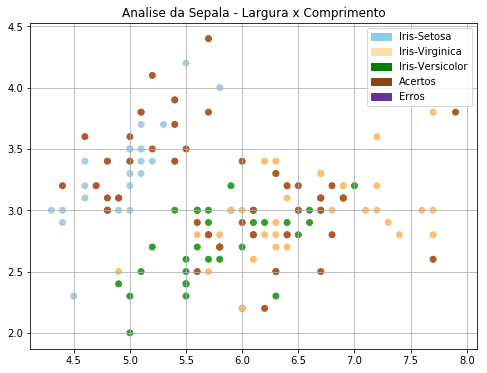

In [16]:
# Vizualizando o corportamento dos dados resultantes através do gráfico de dispersão
# Análise da largura da Sepala por Comprimento da Sepala
plt.scatter(
    dataset_resultado['Largura Sepala'], dataset_resultado['Comprimento Sepala'], 
    c=dataset_resultado['Tipo'], cmap='Paired', alpha=1
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
bege = mpatches.Patch(color='navajowhite', label='Iris-Virginica')
verde = mpatches.Patch(color='green', label='Iris-Versicolor')
marron = mpatches.Patch(color='saddlebrown', label='Acertos')
roxo = mpatches.Patch(color='rebeccapurple', label='Erros')

plt.legend(handles=[azul, bege, verde, marron, roxo])
plt.title('Analise da Sepala - Largura x Comprimento')

plt.grid(True)
plt.show()

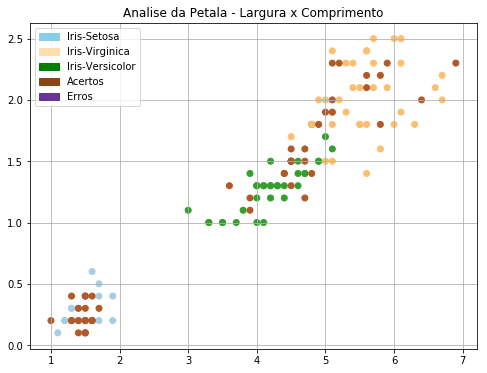

In [17]:
# Vizualizando o corportamento dos dados resultantes através do gráfico de dispersão
# Análise da largura da Petala por Comprimento da Petala
plt.scatter(
    dataset_resultado['Largura Petala'], dataset_resultado['Comprimento Petala'], 
    c=dataset_resultado['Tipo'], cmap='Paired', alpha=1
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
bege = mpatches.Patch(color='navajowhite', label='Iris-Virginica')
verde = mpatches.Patch(color='green', label='Iris-Versicolor')
marron = mpatches.Patch(color='saddlebrown', label='Acertos')
roxo = mpatches.Patch(color='rebeccapurple', label='Erros')

plt.legend(handles=[azul, bege, verde, marron, roxo])
plt.title('Analise da Petala - Largura x Comprimento')

plt.grid(True)
plt.show()

In [18]:
acuracia = knn.score(x_teste, y_teste)
acuracia

1.0